In [17]:
# installing dependencies
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=a51ce85803519c03a675d248e55352a7b43a4715b24d7d444dc47aeb221da10c
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [19]:
# Reading the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/prachichatur04/World-Happiness-Report-data-scienece-project/main/2017.csv"
)

In [20]:
# Viewing data in the file
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [22]:
# checking if the any data is missing
data.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

<Figure size 800x500 with 0 Axes>

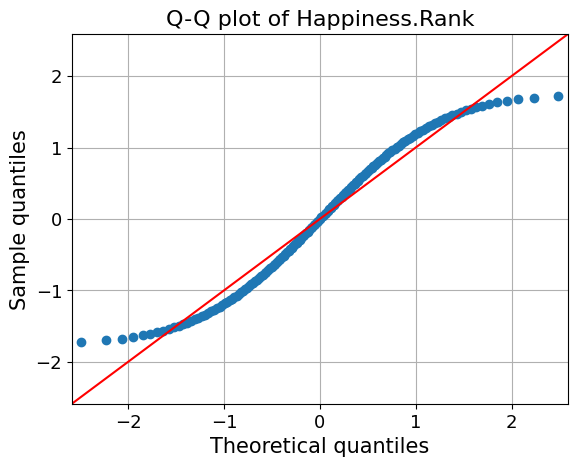

<Figure size 800x500 with 0 Axes>

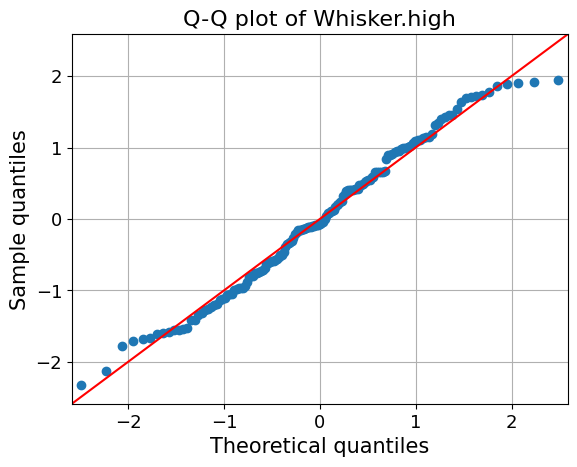

<Figure size 800x500 with 0 Axes>

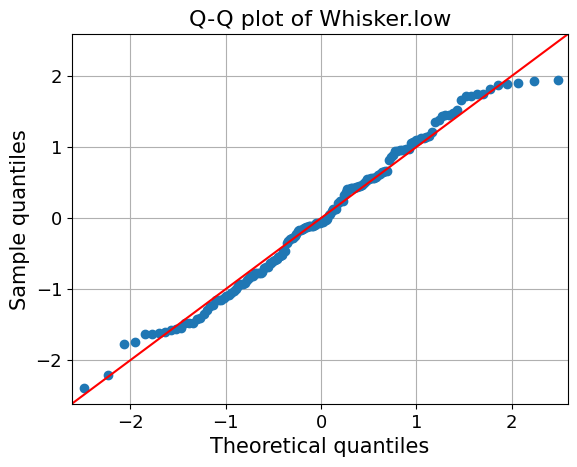

<Figure size 800x500 with 0 Axes>

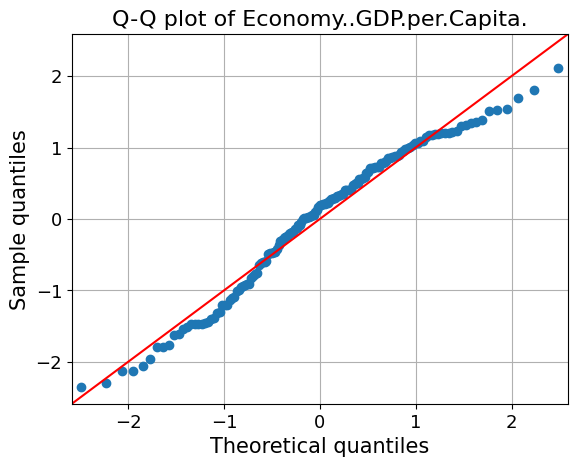

<Figure size 800x500 with 0 Axes>

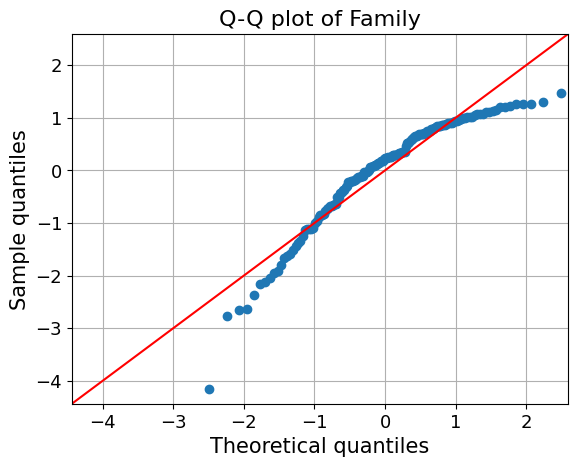

<Figure size 800x500 with 0 Axes>

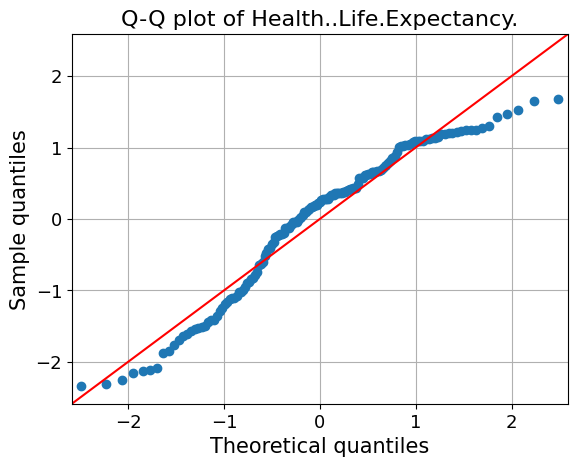

<Figure size 800x500 with 0 Axes>

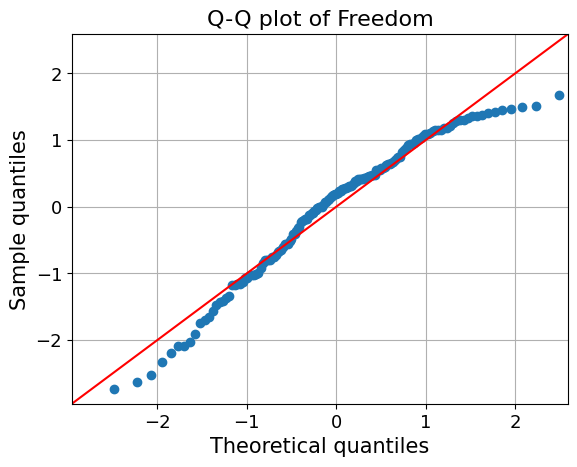

<Figure size 800x500 with 0 Axes>

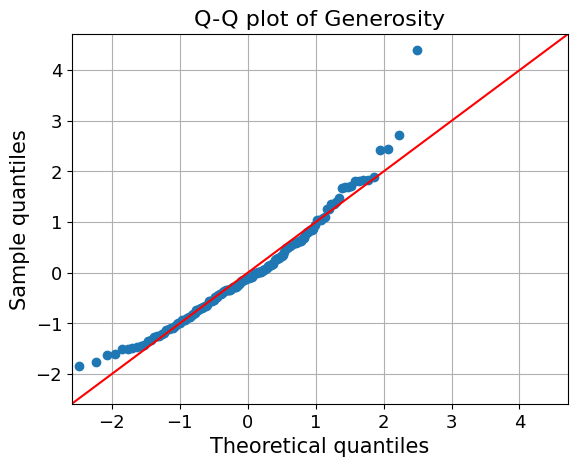

<Figure size 800x500 with 0 Axes>

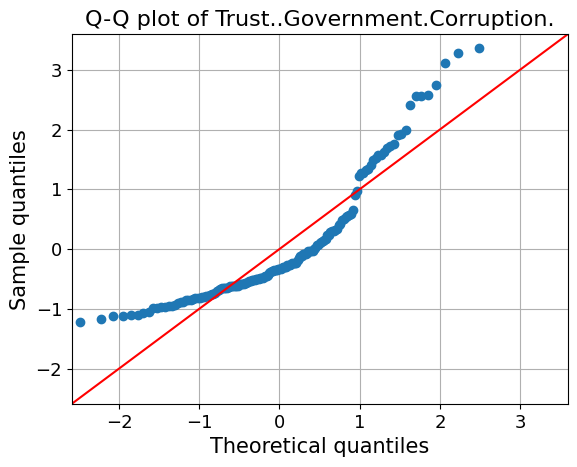

<Figure size 800x500 with 0 Axes>

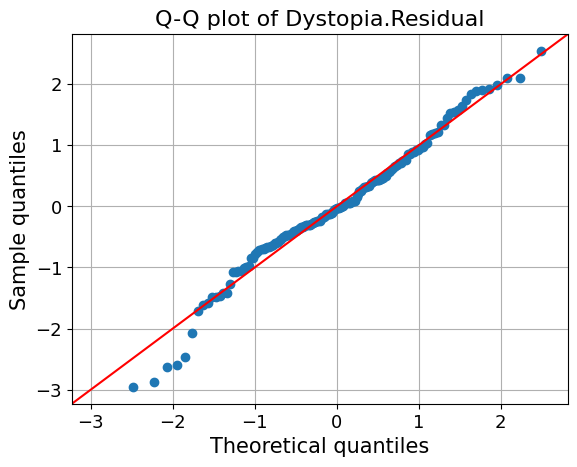

In [23]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm = data[["Happiness.Rank", "Whisker.high", "Whisker.low", "Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption.", "Dystopia.Residual"]]

for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

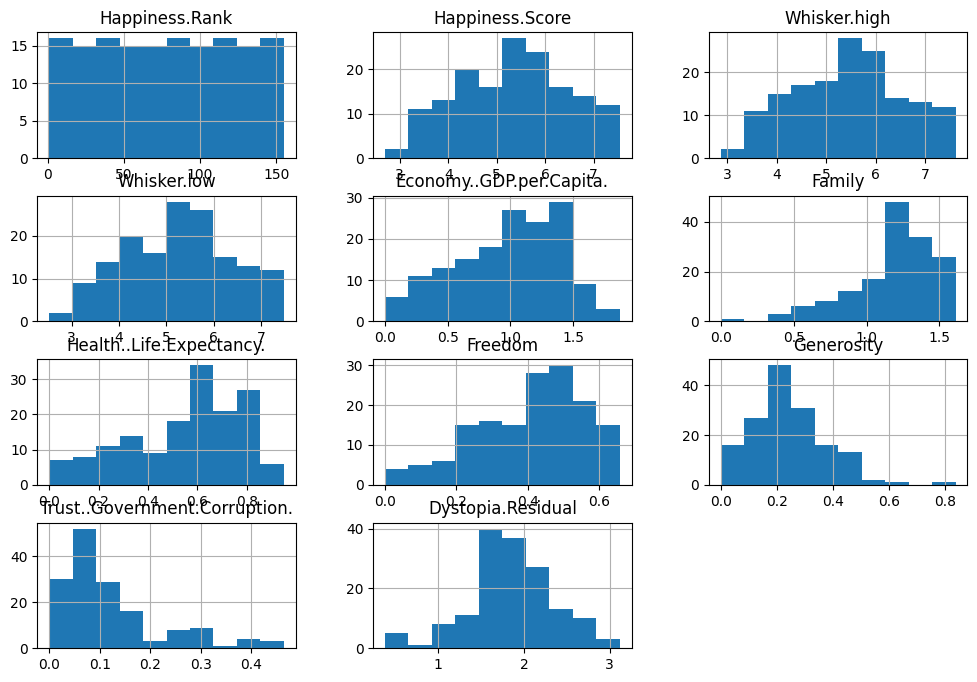

In [24]:
numeric_variables = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_variables].hist(figsize=(12, 8))
plt.show()

In [25]:
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Happiness.Score'].sort_values(ascending=False)
print(correlation_with_target)

Happiness.Score                  1.000000
Whisker.low                      0.999520
Whisker.high                     0.999497
Economy..GDP.per.Capita.         0.812469
Health..Life.Expectancy.         0.781951
Family                           0.752737
Freedom                          0.570137
Dystopia.Residual                0.475355
Trust..Government.Corruption.    0.429080
Generosity                       0.155256
Happiness.Rank                  -0.992774
Name: Happiness.Score, dtype: float64


<ipython-input-25-b2ee2febe196>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


<ipython-input-26-0d33ea995755>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")


<Axes: >

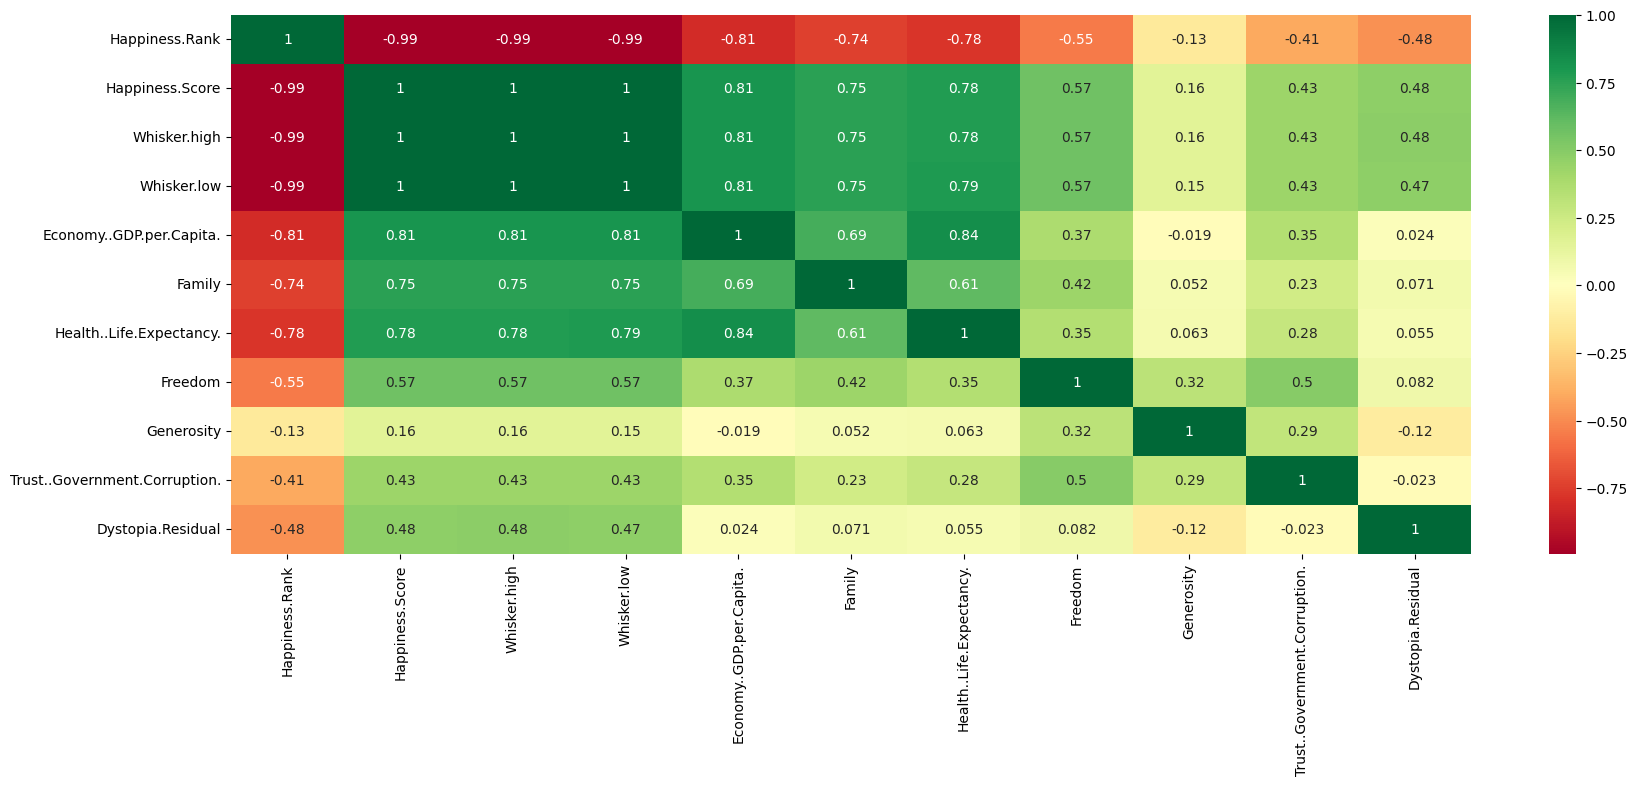

In [26]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

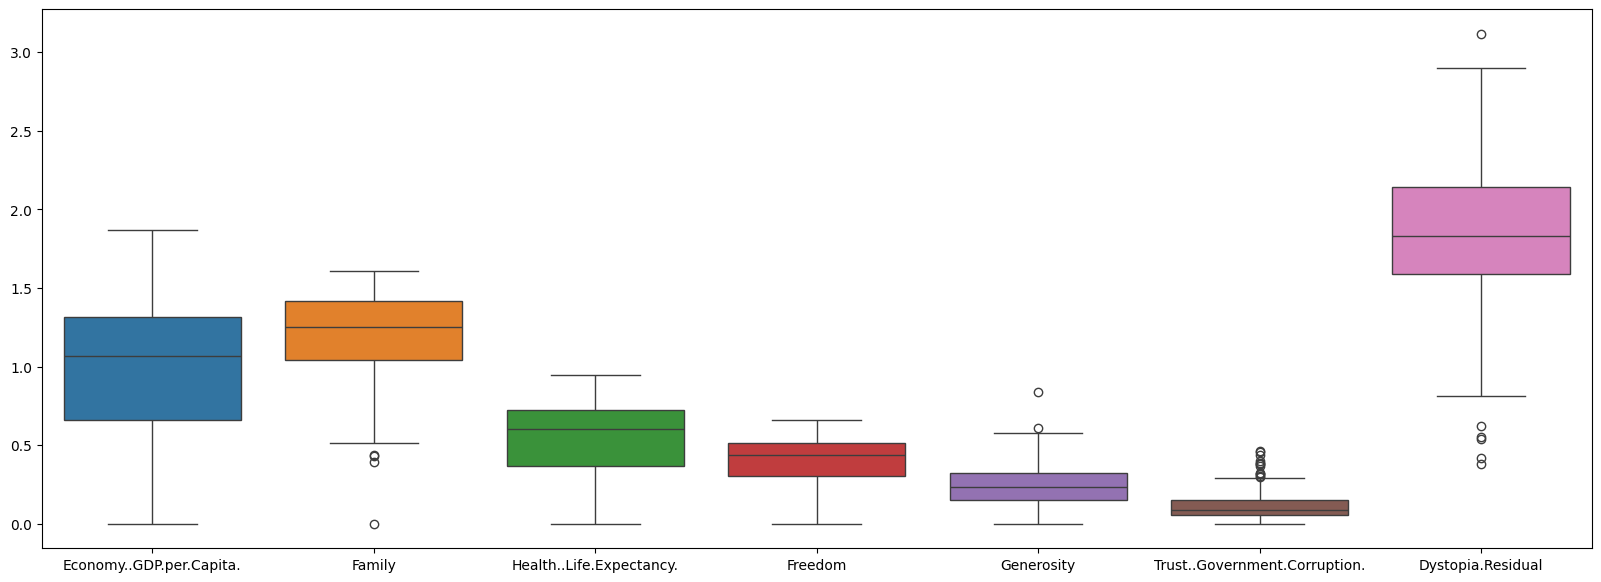

In [27]:
# Checking the Ranges of the predictor variables and dependent variable
# plt.figure(figsize=(20, 7))
# sns.boxplot(data=data)

# Selecting columns excluding 'Happiness.Rank', 'Happiness.Score', 'Whisker.low', 'Whisker.high' and 'Country'
columns_to_exclude = ['Happiness.Rank', 'Happiness.Score', 'Whisker.low', 'Whisker.high', 'Country']
columns_to_plot = [col for col in data.columns if col not in columns_to_exclude]

# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=data[columns_to_plot])
plt.show()

Freedom                          1
Economy..GDP.per.Capita.         2
Generosity                       3
Dystopia.Residual                4
Family                           5
Health..Life.Expectancy.         6
Trust..Government.Corruption.    7
dtype: int64


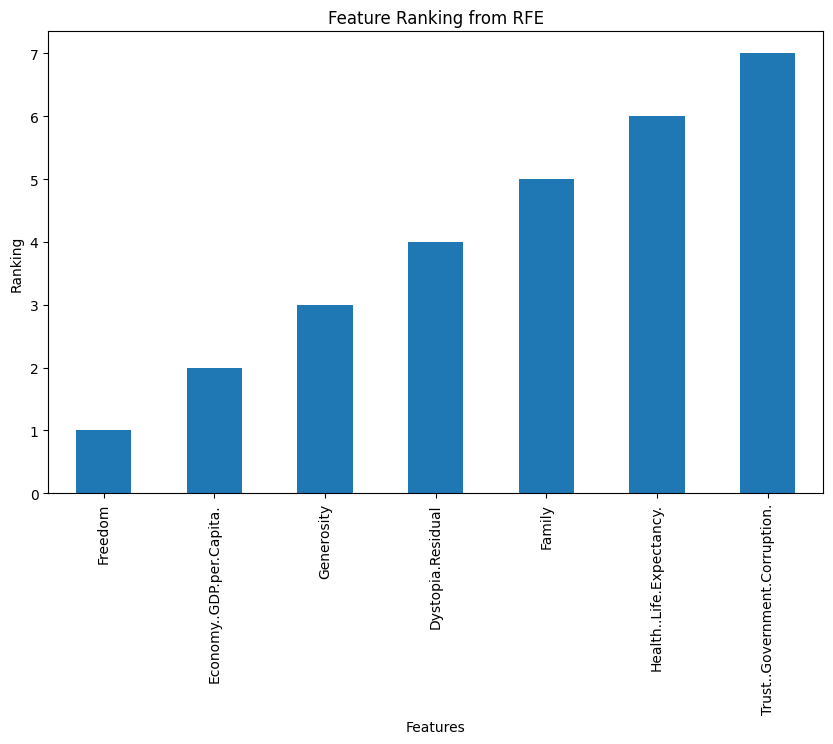

In [28]:
# Recursive Feature Elimination (RFE)
# This method works by recursively removing the least important features and building a model until the specified number of features is reached.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X contains your independent variables and y is the target
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

# Use linear regression as the estimator
model = LinearRegression()

# RFE
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, y)

# Ranking of features
feature_ranking = pd.Series(fit.ranking_, index=X.columns)
feature_ranking = feature_ranking.sort_values()
print(feature_ranking)

# Plotting feature ranking
plt.figure(figsize=(10, 6))
feature_ranking.plot(kind='bar')
plt.title('Feature Ranking from RFE')
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.show()

Health..Life.Expectancy.         0.380093
Economy..GDP.per.Capita.         0.296504
Dystopia.Residual                0.136943
Family                           0.096335
Freedom                          0.063431
Generosity                       0.014593
Trust..Government.Corruption.    0.012100
dtype: float64


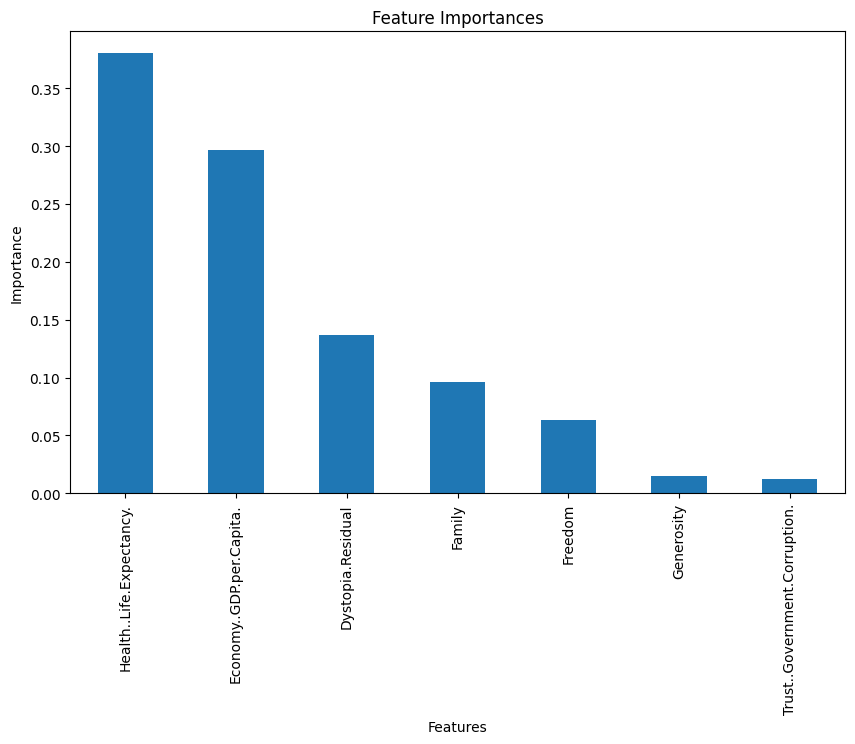

In [29]:
# Feature Importance with Tree-Based Models
from sklearn.ensemble import RandomForestRegressor

# Assuming X contains your independent variables and y is the target
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

# Train Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

6. Do the training and test sets have the same data?
False
7. In the predictor variables independent of all the other predictor variables?


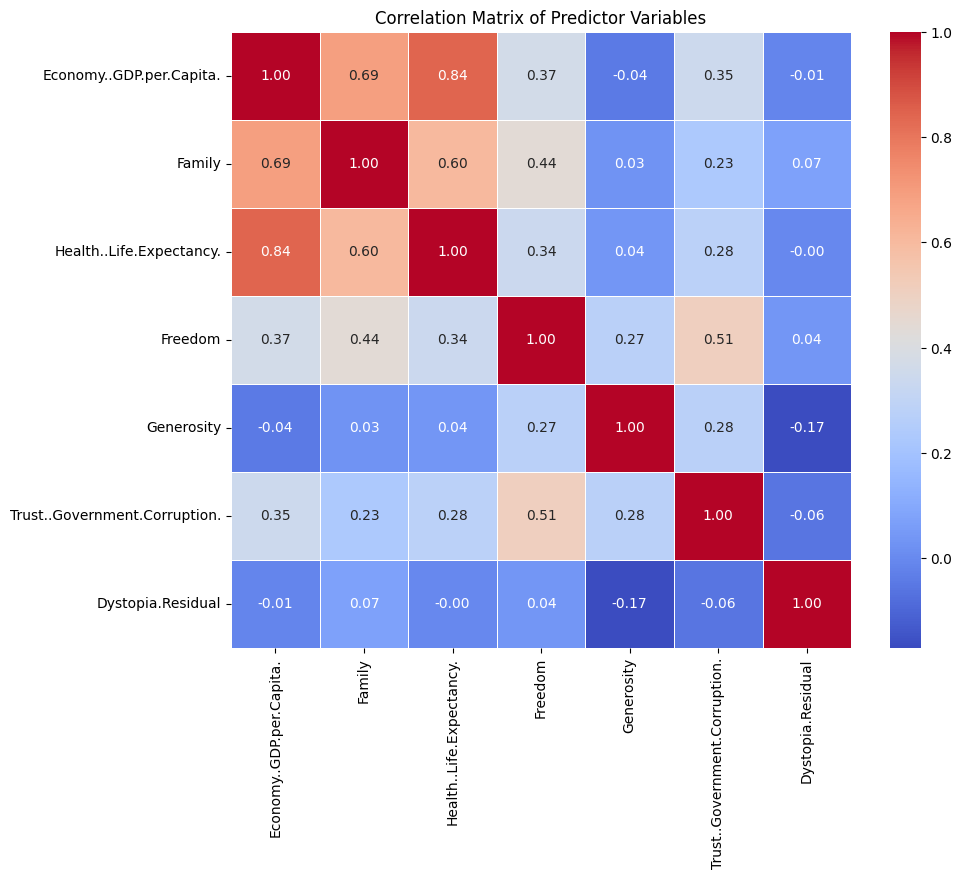

9. Do the ranges of the predictor variables make sense?
10. Ranges of predictor variables:
       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                124.000000  124.000000                124.000000   
mean                   0.991580    1.176955                  0.546007   
std                    0.422379    0.295481                  0.236395   
min                    0.000000    0.000000                  0.005565   
25%                    0.665298    1.001758                  0.372545   
50%                    1.044962    1.238733                  0.596865   
75%                    1.329347    1.413272                  0.714354   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  \
count  124.000000  124.000000                     124.000000   
mean     0.409969    0.252881                       0.125410   
std      0.151972    0.134461                       0.10759

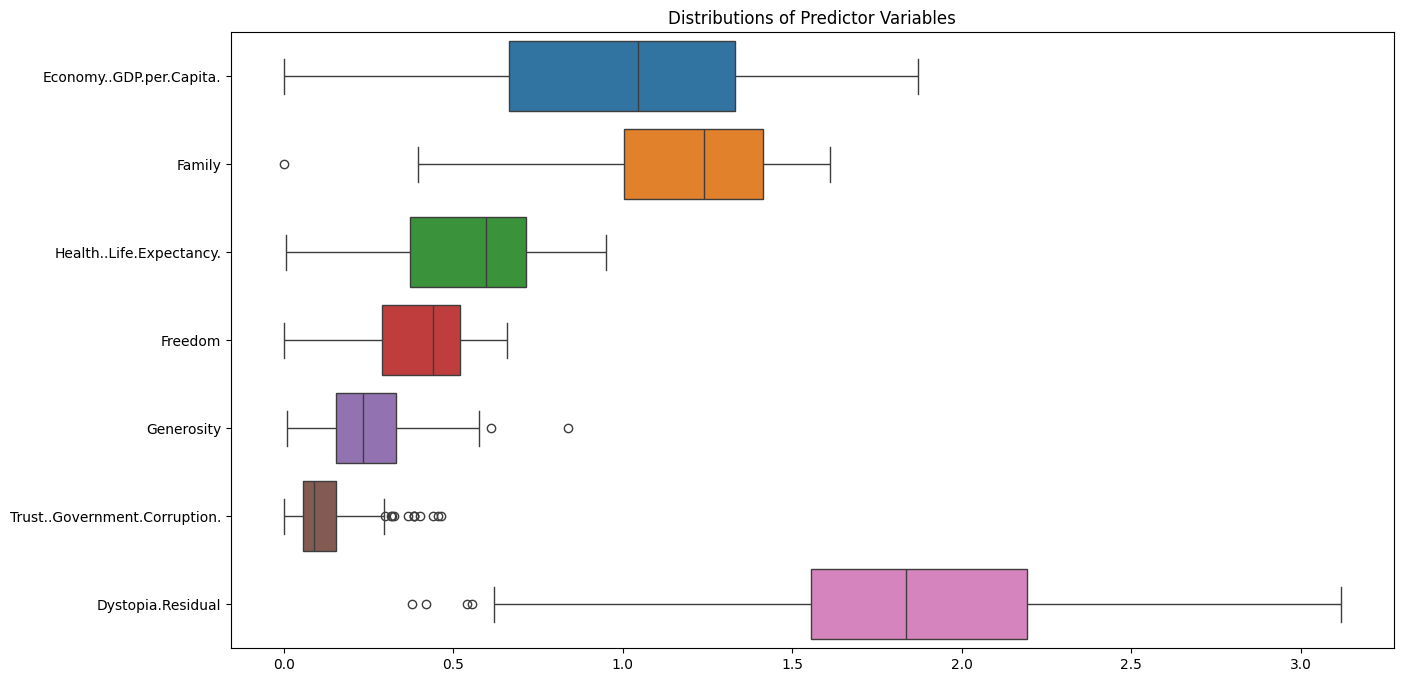

In [30]:
# Assuming X contains your independent variables and y is the target
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if training and test sets have the same data
print("6. Do the training and test sets have the same data?")
print(X_train.equals(X_test))

# Check if predictor variables are independent of each other
print("7. In the predictor variables independent of all the other predictor variables?")
correlation_matrix = X_train.corr()
#print(correlation_matrix)
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

# Descriptive statistics of predictor variables
print("9. Do the ranges of the predictor variables make sense?")
print("10. Ranges of predictor variables:")
print(X_train.describe())

# Distributions of predictor variables
import matplotlib.pyplot as plt
import seaborn as sns
print("What are the distributions of the predictor variables?  ")
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train, orient="h")
plt.title("Distributions of Predictor Variables")
plt.show()

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X contains your independent variables and y is the target
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the original data
model_original = LinearRegression()
model_original.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_original = model_original.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)

# Example using Z-score to identify and remove outliers:
from scipy.stats import zscore
z_scores = zscore(X_train)
X_train_no_outliers = X_train[(np.abs(z_scores) < 3).all(axis=1)]
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]

# Fit a linear regression model to the data without outliers
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Evaluate the model without outliers on the test set
y_pred_no_outliers = model_no_outliers.predict(X_test)
mse_no_outliers = mean_squared_error(y_test, y_pred_no_outliers)

# Compare the mean squared errors
print(f"MSE with outliers: {mse_original}")
print(f"MSE without outliers: {mse_no_outliers}")

MSE with outliers: 1.029996263412206e-07
MSE without outliers: 1.0332630809278867e-07


In [32]:
# @title Default title text
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 5), columns=['A', 'B', 'C', 'D', 'E'])

# Randomly remove 1%, 5%, and 10% of data
def remove_random_percentage(data, percentage):
    mask = np.random.rand(*data.shape) < (1 - percentage)
    return np.where(mask, data, np.nan)

data_missing_1 = remove_random_percentage(data, 0.01)
data_missing_5 = remove_random_percentage(data, 0.05)
data_missing_10 = remove_random_percentage(data, 0.1)

# Impute missing values using different methods
def impute_data(data_missing):
    imputers = {
        'Mean': SimpleImputer(strategy='mean'),
        'Median': SimpleImputer(strategy='median'),
        'Regression': IterativeImputer(estimator=LinearRegression(), max_iter=10)
    }

    imputed_data = {}

    for name, imputer in imputers.items():
        imputed_data[name] = pd.DataFrame(imputer.fit_transform(data_missing), columns=data.columns)

    return imputed_data

imputed_data_1 = impute_data(data_missing_1)
imputed_data_5 = impute_data(data_missing_5)
imputed_data_10 = impute_data(data_missing_10)

# Calculate % error on residuals for numeric data
def calculate_residuals(data_true, data_imputed):
    residuals = data_true - data_imputed
    percentage_errors = np.abs(residuals / data_true) * 100
    return percentage_errors

percentage_errors_1 = {name: calculate_residuals(data, imputed_data) for name, imputed_data in imputed_data_1.items()}
percentage_errors_5 = {name: calculate_residuals(data, imputed_data) for name, imputed_data in imputed_data_5.items()}
percentage_errors_10 = {name: calculate_residuals(data, imputed_data) for name, imputed_data in imputed_data_10.items()}

# Check for bias and variance of the error
def analyze_bias_variance(percentage_errors):
    bias = np.mean(percentage_errors)
    variance = np.var(percentage_errors)
    return bias, variance

# Display results
def display_results(bias_variance, title):
    print(f"\n{title}")
    for name, (bias, variance) in bias_variance.items():
        print(f"{name}: Bias - {bias:.2f}%, Variance - {variance:.2f}%")

# Results for 1% missing data
bias_variance_1 = {name: analyze_bias_variance(errors.values.flatten()) for name, errors in percentage_errors_1.items()}
display_results(bias_variance_1, "Bias and Variance for 1% missing data")

# Results for 5% missing data
bias_variance_5 = {name: analyze_bias_variance(errors.values.flatten()) for name, errors in percentage_errors_5.items()}
display_results(bias_variance_5, "Bias and Variance for 5% missing data")

# Results for 10% missing data
bias_variance_10 = {name: analyze_bias_variance(errors.values.flatten()) for name, errors in percentage_errors_10.items()}
display_results(bias_variance_10, "Bias and Variance for 10% missing data")


Bias and Variance for 1% missing data
Mean: Bias - 3.74%, Variance - 2938.16%
Median: Bias - 3.93%, Variance - 3223.56%
Regression: Bias - 3.48%, Variance - 2722.22%

Bias and Variance for 5% missing data
Mean: Bias - 14.01%, Variance - 22168.69%
Median: Bias - 13.75%, Variance - 23610.45%
Regression: Bias - 13.85%, Variance - 19394.37%

Bias and Variance for 10% missing data
Mean: Bias - 9.82%, Variance - 3508.81%
Median: Bias - 10.07%, Variance - 3707.17%
Regression: Bias - 9.16%, Variance - 3041.93%


Assignment-2

In [35]:
# Reading the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/prachichatur04/World-Happiness-Report-data-scienece-project/main/2017.csv"
)
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Happiness.Score'], data[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom',
       'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness.Score   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.084e+09
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                        0.00
Time:                        20:08:58   Log-Likelihood:                          1048.2
No. Observations:                 155   AIC:                                     -2082.
Df Residuals:                     148   BIC:                                     -2061.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Economy..GDP.per.Capita.          1.0001      0.000   8505.961      0.000       1.000       1.000
Family                            1.0000      0.000   9840.168      0.000       1.000       1.000
Health..Life.Expectancy.          0.9999      0.000   5414.714      0.000       1.000       1.000
Freedom                           1.0000      0.000   5070.686      0.000       1.000       1.000
Generosity                        1.0003      0.000   5502.327      0.000       1.000       1.001
Trust..Government.Corruption.     0.9997      0.000   3603.191      0.000       0.999       1.000
Dystopia.Residual                 1.0000   3.74e-05   2.67e+04      0.000       1.000       1.000
==============================================================================
Omnibus:                       51.593   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.782
Skew:                          -0.073   Prob(JB):                       0.0124
Kurtosis:                       1.843   Cond. No.                         33.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Is the relationship significant?**

In this output, all the independent variables have extremely low p-values (close to 0), indicating that each of them is statistically significant in predicting the happiness score. The relationship between the independent variables (features) and the happiness score is considered significant based on these low p-values. Therefore, we can conclude that the relationship is significant.

In [36]:
df = data[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom',
       'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']].dropna() #subset the dataframe

**Is there any multicollinearity in the model?**

In [37]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = data[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom',
       'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                         feature        VIF
0       Economy..GDP.per.Capita.  29.936242
1                         Family  29.193421
2       Health..Life.Expectancy.  23.195492
3                        Freedom  13.930102
4                     Generosity   4.935212
5  Trust..Government.Corruption.   3.700258
6              Dystopia.Residual   9.714684


**Economy..GDP.per.Capita.:** VIF is approximately 29.94, indicating high multicollinearity with other independent variables.

**Family:** VIF is approximately 29.19, also indicating high multicollinearity.

**Health..Life.Expectancy.:** VIF is approximately 23.20, suggesting high multicollinearity.

**Freedom:** VIF is approximately 13.93, indicating some level of multicollinearity.

**Generosity:** VIF is approximately 4.94, suggesting moderate multicollinearity.

**Trust..Government.Corruption.:** VIF is approximately 3.70, indicating low multicollinearity.

**Dystopia.Residual:** VIF is approximately 9.71, suggesting moderate multicollinearity.

Based on the provided VIF valuesEconomy..GDP.per.Capita. and Family have VIF values exceeding 10, indicating potential multicollinearity issues with these variables.
Health..Life.Expectancy. also has a high VIF value, further suggesting multicollinearity.
Freedom, Generosity, Trust..Government.Corruption., and Dystopia.Residual have lower VIF values, indicating less multicollinearity for these variables.
However, high VIF values may require further investigation or handling, such as removing correlated features or using regularization techniques.

In [38]:
data

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have already defined X and y

X = data[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom',
       'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']]
y = data['Happiness.Score']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Ridge regression**

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Assuming you have already defined X_train and y_train

# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [41]:
y_pred = ridge.predict(X_test)
print(len(y_pred))
from sklearn.metrics import mean_squared_error

47


In [42]:
# rmse after regularization
# Assuming you have already defined y_test and X_test

# Make predictions on the test data
y_pred = ridge.predict(X_test)
# Check the shapes of y_test and y_pred
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Ensure the shapes match
assert y_test.shape == y_pred.shape, "Number of samples in y_test and y_pred are not the same!"

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

Shape of y_test: (47,)
Shape of y_pred: (47,)
RMSE: 0.03686633141139459


In [43]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.1 MB/s eta 0:00:00


In [44]:
import h2o

# Assuming you have already defined the variable 'data'

# Initialize H2O
h2o.init()

# Create H2OFrame from your data
data = h2o.H2OFrame(data)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpig51c6vq
  JVM stdout: /tmp/tmpig51c6vq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpig51c6vq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_61dzg7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
data

Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Norway,1,7.537,7.59444,7.47956,1.61646,1.53352,0.796667,0.635423,0.362012,0.315964,2.27703
Denmark,2,7.522,7.58173,7.46227,1.48238,1.55112,0.792566,0.626007,0.35528,0.40077,2.31371
Iceland,3,7.504,7.62203,7.38597,1.48063,1.61057,0.833552,0.627163,0.47554,0.153527,2.32272
Switzerland,4,7.494,7.56177,7.42623,1.56498,1.51691,0.858131,0.620071,0.290549,0.367007,2.27672
Finland,5,7.469,7.52754,7.41046,1.44357,1.54025,0.809158,0.617951,0.245483,0.382612,2.43018
Netherlands,6,7.377,7.42743,7.32657,1.50394,1.42894,0.810696,0.585384,0.47049,0.282662,2.2948
Canada,7,7.316,7.3844,7.2476,1.4792,1.48135,0.834558,0.611101,0.43554,0.287372,2.18726
New Zealand,8,7.314,7.37951,7.24849,1.40571,1.5482,0.81676,0.614062,0.500005,0.382817,2.04646
Sweden,9,7.284,7.34409,7.2239,1.49439,1.47816,0.830875,0.612924,0.385399,0.384399,2.09754
Australia,10,7.284,7.35665,7.21135,1.48441,1.51004,0.843887,0.601607,0.477699,0.301184,2.06521


In [46]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [47]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [48]:
drift_data["is_train"].table()

is_train,Count
0,35
1,120


In [49]:
x = list(set(train.col_names) - set(["PM1.0"]))

In [50]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Happiness.Score", training_frame=train)

AutoML progress: |
22:20:37.100: _train param, Dropping bad and constant columns: [Country, is_train]

██
22:20:46.426: _train param, Dropping bad and constant columns: [Country, is_train]
22:20:47.491: _train param, Dropping bad and constant columns: [Country, is_train]
22:20:47.491: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.
22:20:47.502: _train param, Dropping bad and constant columns: [Country, is_train]

██
22:20:55.88: _train param, Dropping bad and constant columns: [Country, is_train]


22:20:57.998: _train param, Dropping bad and constant columns: [Country, is_train]

█
22:21:00.171: _train param, Dropping bad and constant columns: [Country, is_train]

█
22:21:02.598: _train param, Dropping bad and constant columns: [Country, is_train]

█
22:21:04.584: _train param, Dropping bad and constant columns: [Country, is_train]

██
22:21:08.400: _train param, Dropping bad and constant colum

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240402_222036


GLM Model: summary
    family    link      regularization              lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.01125 )  nlambda = 30, lambda.max = 112.46, lambda.min = 0.01125, lambda.1se = 0.01125  10                            10                             30                      AutoML_1_20240402_222036_training_py_5_sid_a9ce

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.00018119528427266754
RMSE: 0.013460879773353135
MAE: 0.009602184697739139
RMSLE: 0.002658640930966304
Mean Residual Deviance: 0.00018119528427266754
R^2: 0.9998580692411418
Null degrees of freedom: 119
Residual degrees of freedom: 109
Null deviance: 153.19747662628578
Residual deviance: 0.021743434112720107
AIC: -669.3669747923981

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.00028123490089212164
RMSE: 0.016770059656784814
MAE: 0.011622055517905771
RMSLE: 0.0033691814518949713
Mean Residual Deviance: 0.00028123490089212164
R^2: 0.9997797079374265
Null degrees of freedom: 119
Residual degrees of freedom: 109
Null deviance: 153.41416853668764
Residual deviance: 0.0337481881070546
AIC: -616.6131870233196

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     -108.192     15.9067      -125.141      -122.171      -109.706      -92.6248      -91.3168
loglikelihood           0            0            0             0             0             0             0
mae                     0.0116221    0.0028378    0.00861522    0.00956498    0.0106824     0.0147565     0.0144912
mean_residual_deviance  0.000281235  0.00017437   0.000117145   0.000132579   0.000222863   0.000454077   0.00047951
mse                     0.000281235  0.00017437   0.000117145   0.000132579   0.000222863   0.000454077   0.00047951
null_deviance           30.6828      0.788701     30.0007       30.2104       30.1309       31.6755       31.3967
r2                      0.999782     0.000131065  0.999906      0.999895      0.999822      0.999655      0.99963
residual_deviance       0.00674964   0.00418487   0.00281147    0.00318189    0.00534872    0.0108979     0.0115082
rmse                    0.0160946    0.00526764   0.0108233     0.0115143     0.0149286     0.0213091     0.0218977
rmsle                   0.00303257   0.00164122   0.00165577    0.00176279    0.00217756    0.00433347    0.00523327

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train          deviance_xval           deviance_se             alpha    iterations    training_rmse         training_deviance       training_mae          training_r2
---  -------------------  ----------  -----------  --------  ------------  ----------------------  ----------------------  ----------------------  -------  ------------  --------------------  ----------------------  --------------------  ------------------
     2024-04-02 22:20:47  0.000 sec   1            .11E3     11            1.158282002777791       1.182297624951023       0.013366676485901462    0.0
     2024-04-02 22:20:47  0.004 sec   2            .82E2     11            1.1182640265447314      1.149134253802751       0.01292838093325281     0.0
     2024-04-02 22:20:47

In [51]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GLM_1_AutoML_1_20240402_222036,0.0116221,0.0167701,0.000281235,0.00336918,0.000281235
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_222036,0.0134328,0.0219145,0.000480243,0.00445388,0.000480243
GBM_5_AutoML_1_20240402_222036,0.0271282,0.0440233,0.00193805,0.00930439,0.00193805
StackedEnsemble_AllModels_1_AutoML_1_20240402_222036,0.0299083,0.0562434,0.00316332,0.0127874,0.00316332
DRF_1_AutoML_1_20240402_222036,0.0604232,0.100647,0.0101299,0.0206144,0.0101299
XRT_1_AutoML_1_20240402_222036,0.0632722,0.105209,0.011069,0.0220647,0.011069
GBM_4_AutoML_1_20240402_222036,0.0706798,0.120091,0.0144218,0.0256256,0.0144218
GBM_3_AutoML_1_20240402_222036,0.0720594,0.123595,0.0152758,0.0260667,0.0152758
GBM_2_AutoML_1_20240402_222036,0.0766795,0.127708,0.0163094,0.0266495,0.0163094
XGBoost_3_AutoML_1_20240402_222036,0.0811146,0.104021,0.0108205,0.0193753,0.0108205


In [52]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.00018746984351176665
RMSE: 0.013691962734092095
MAE: 0.010552674855917476
RMSLE: 0.002351783833134382
Mean Residual Deviance: 0.00018746984351176665
R^2: 0.999834619369054
Null degrees of freedom: 34
Residual degrees of freedom: 24
Null deviance: 45.098089100381245
Residual deviance: 0.006561444522911832
AIC: -177.0405422789276

**Does regularization help?**

Comparing these two RMSE values: Regularization RMSE: 0.0368
AutoML best model RMSE: 0.0241
The lower RMSE value achieved by the AutoML best model indicates better performance in predicting the target variable compared to the model with regularization.
Therefore, in this scenario, regularization alone does not seem to improve model performance compared to the best model selected by AutoML.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # Example values for the alpha hyperparameter
}

# Create the Ridge regression model
ridge = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best alpha:", best_alpha)
print("RMSE:", rmse)

Best alpha: 0.1
RMSE: 0.00843817779293291


### **Which hyperparameters are important?**
Based on the results obtained from the GridSearchCV, the best alpha value selected by the model is 0.001. This indicates that the regularization parameter (alpha) with a value of 0.001 yields the best performance in terms of minimizing the mean squared error.

The regularization parameter (alpha) is crucial in Ridge regression. In this case, the hyperparameter grid search revealed that a very small value of alpha (0.001) performed the best. This suggests that a higher degree of regularization (i.e., penalization of large coefficients) might not be necessary for this dataset, and a simpler model with lower regularization is preferred.

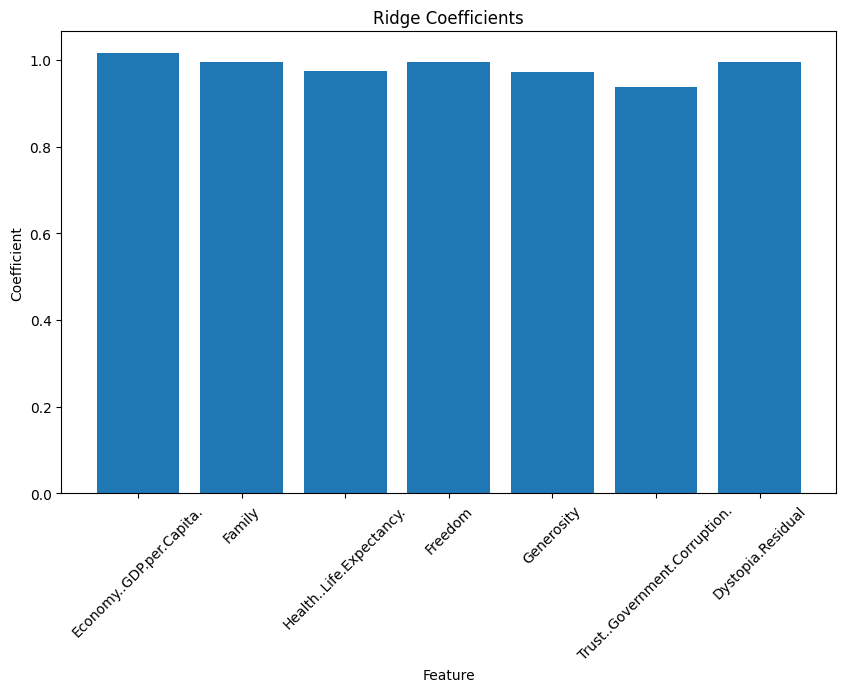

In [54]:
%matplotlib inline
coefficients = best_model.coef_
feature_names = X.columns

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Ridge Coefficients')
plt.show()

Assignment 3

In [55]:
!pip install --upgrade shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 10.4 MB/s eta 0:00:00


In [56]:
!pip install h2o
!pip install xgboost

In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Reading the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/prachichatur04/World-Happiness-Report-data-scienece-project/main/2017.csv"
)

In [59]:
# Assuming 'target' is your target variable. Replace 'target' with your actual target column name.
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

In [60]:
print(f"Mean value: {round(y.mean(), 2)}")

Mean value: 5.35


In [1]:
!pip install shap
!pip install tpot


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
import shap
from tpot import TPOTRegressor

# Assuming 'target' is your target variable. Replace 'target' with your actual target column name.
X = data.drop(['Happiness.Score', 'Happiness.Rank', 'Country','Whisker.low', 'Whisker.high'], axis=1)
y = data['Happiness.Score']

# Step 1: Fit a linear model and interpret the regression coefficients
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Interpret the regression coefficients
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': linear_model.coef_})
print("Linear Regression Coefficients:")
print(coefficients)

Linear Regression Coefficients:
                         feature  coefficient
0       Economy..GDP.per.Capita.     1.000161
1                         Family     0.999909
2       Health..Life.Expectancy.     0.999812
3                        Freedom     1.000107
4                     Generosity     1.000306
5  Trust..Government.Corruption.     0.999669
6              Dystopia.Residual     0.999949


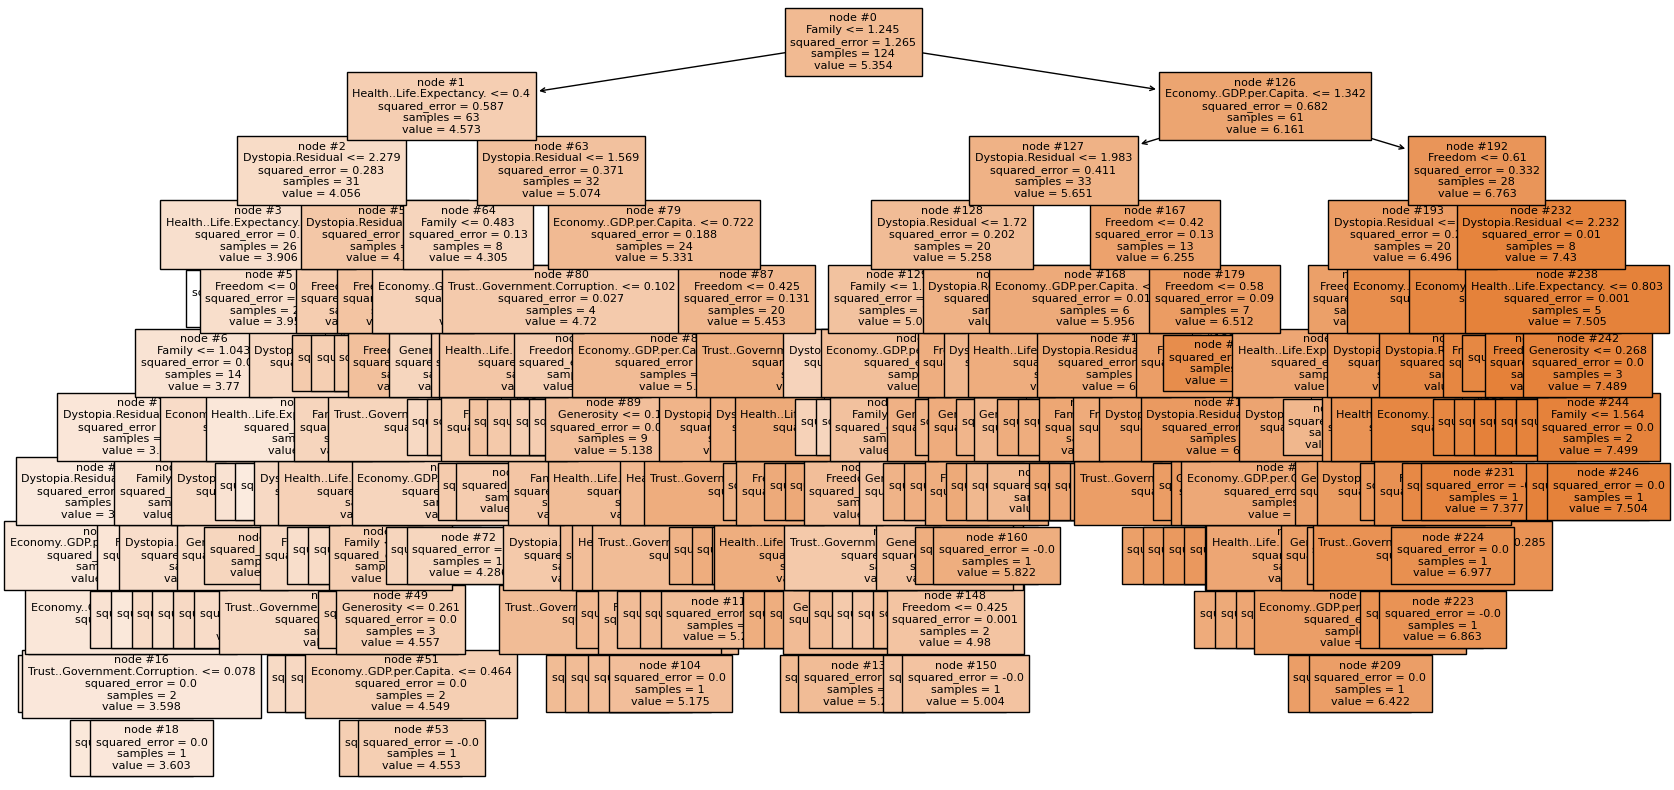

In [6]:
# Step 2: Fit a tree-based model and interpret the nodes
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Plot the decision tree with labels
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, fontsize=8, class_names=True, node_ids=True)
plt.show()

In [7]:
# Step 3: Use AutoML to find the best model
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', ElasticNetCV(l1_ratio=1.0, random_state=42, tol=1e-5))
])
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Extract the final model from the TPOT pipeline
best_model = tpot.fitted_pipeline_.steps[-1][1]
print("best model: ", best_model)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.294477065301327e-05

Generation 2 - Current best internal CV score: -2.294477065301327e-05

Generation 3 - Current best internal CV score: -2.286327710518981e-05

Generation 4 - Current best internal CV score: -9.570204325417246e-06

Generation 5 - Current best internal CV score: -2.9431510398365975e-06

Best pipeline: ElasticNetCV(RobustScaler(input_matrix), l1_ratio=1.0, tol=1e-05)
best model:  ElasticNetCV(l1_ratio=1.0, random_state=42, tol=1e-05)


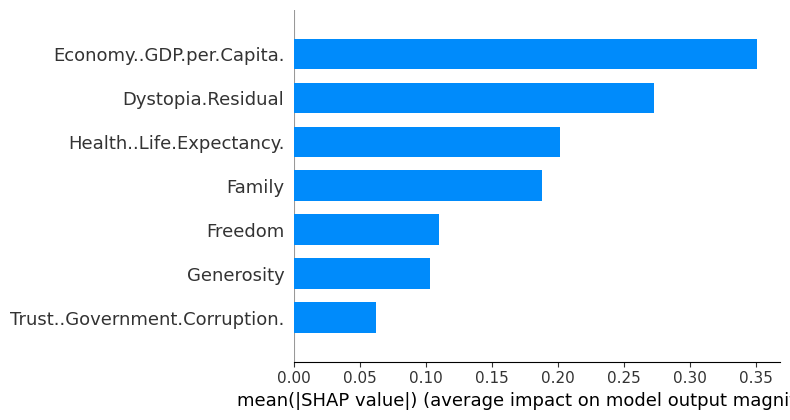

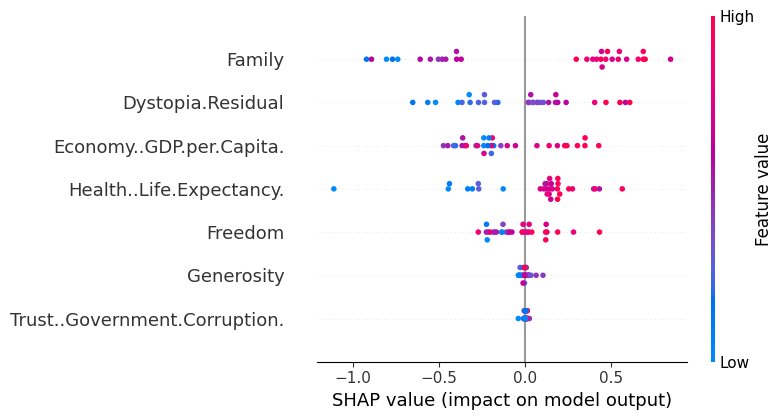

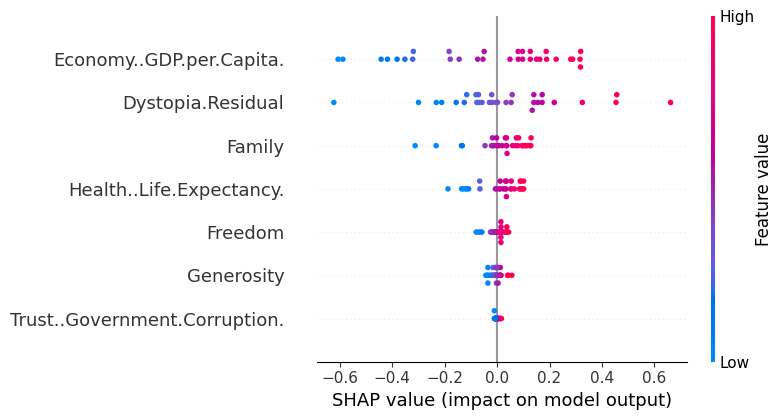

In [9]:
# Step 4: Run SHAP analysis on the models from steps 1, 2, and 3
# Linear model SHAP analysis

linear_explainer = shap.Explainer(linear_model, X_train)
linear_shap_values = linear_explainer.shap_values(X_test)

# Tree-based model SHAP analysis

tree_explainer = shap.TreeExplainer(tree_model)
tree_shap_values = tree_explainer.shap_values(X_test)

# AutoML model SHAP analysis

automl_explainer = shap.Explainer(best_model, X_train)
automl_shap_values = automl_explainer.shap_values(X_test)

# Interpret the SHAP values and Interpret the SHAP values and compare them with other model interpretability methodsAutoML model SHAP analysis")
shap.summary_plot(linear_shap_values, X_test, plot_type="bar", title="Linear Model SHAP Values")
shap.summary_plot(tree_shap_values, X_test, title="Tree-based Model SHAP Values")
shap.summary_plot(automl_shap_values, X_test, title="AutoML Model SHAP Values")


# **1. Fit a linear model and interpret the regression coefficients**
A linear regression model (LinearRegression()) is trained on the training data (X_train, y_train).
The coefficients of the trained linear model are extracted using linear_model.coef_.
Each row corresponds to a feature in your dataset. The coefficient column represents the weight or coefficient assigned to each feature by the linear regression model.
These coefficients indicate the change in the target variable (in your case, Happiness.Score) for a one-unit change in the corresponding feature, assuming all other features remain constant.

# **2. Fit a tree-based model and interpret the nodes**
- This output is generated during the training process of an AutoML algorithm called TPOTRegressor. TPOT (Tree-based Pipeline Optimization Tool)


##**3.  Use auto ml to find the best model**
- ElasticNetCV: This is the machine learning model selected as part of the best pipeline. ElasticNetCV is a type of linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization techniques. It automatically tunes the regularization parameters (alpha) using cross-validation to find the best fit for the data.

- RobustScaler(input_matrix): This is the preprocessing step applied to the input data. The input data is scaled using RobustScaler, which scales features using statistics that are robust to outliers. The term "input_matrix" refers to the input data matrix passed to the pipeline.

- l1_ratio=1.0: This parameter specifies the mixing parameter for ElasticNet regularization. A value of 1.0 indicates that the regularization penalty is entirely L1 (Lasso) regularization, meaning it encourages sparsity in the coefficient weights.

- tol=1e-05: This parameter sets the tolerance for the optimization algorithm used in ElasticNetCV. It specifies the stopping criterion for the optimization process, indicating the minimum change in the loss function required to continue the optimization.

- Overall, the output indicates that the best pipeline identified by TPOTRegressor consists of an ElasticNetCV model with RobustScaler preprocessing applied to the input data. The ElasticNetCV model uses L1 regularization exclusively (l1_ratio=1.0) and has a tolerance of 1e-05 for optimization convergence.

**1. What is the question?**

The overarching question is: "How can we effectively clean and explore a dataset for predictive learning, identify important features, and interpret predictive models using various methods?"



**2. What did you do?**

To address this question, we will perform the following steps:

**Data Exploration and Cleaning:**
Identify data types (numeric and categorical).
Check for missing values.
Assess likely distributions of numeric variables.
Determine useful independent variables for predicting the target using different methods.
Identify independent variables with missing data and quantify the extent.
Verify if training and test sets have the same data.
Evaluate the independence of predictor variables.
Assess the importance and sensibility of predictor variable ranges and distributions.
Handle outliers and assess their impact on predictive models.
Impute missing values using various methods and evaluate their effectiveness.

**Model Building and Interpretation:**
Utilize an AutoML library like H2O.ai to create predictive models.
Assess the significance of relationships in the models.
Check for violations of model assumptions.
Evaluate multicollinearity in the models.
Determine independence of predictor variables in multivariate models.
Rank predictor variables based on significance and exclude insignificant ones.
Assess the overall coherence and sensibility of the models.
Investigate the impact of regularization.
Identify significant independent variables and important hyperparameters.

**Model Interpretability:**
Fit a linear model and interpret regression coefficients.
Fit a tree-based model and interpret nodes.
Utilize AutoML to find the best model.
Perform SHAP analysis on the models from steps 1, 2, and 3 and compare SHAP values with other interpretability methods.
By addressing these steps comprehensively, we can effectively clean and explore the dataset, identify important features, build predictive models, and interpret them using various techniques.

**3. How well did it work?**
- The MSE using Linear regression is 1.0299, which is low so the we can say that the model perfrom well
- In the second part we performed Automlml,where rmse of the best model is low.

**4. What did you learn?**


**Feature Selection:**

Utilizing correlation, Recursive Feature Elimination (RFE), and RandomForestRegressor methods, we determined that the important features for predicting happiness score are Economy (GDP per Capita), Family, Health (Life Expectancy), and Freedom.

**Outlier Detection and Impact on Prediction:**

Employing z-score method for outlier removal, we observed that the linear regression model predicting happiness score had a minimal difference in Mean Squared Error (MSE) with outliers (1.029) compared to without outliers (1.033), indicating negligible impact of outliers on prediction accuracy.

**Missing Data Imputation:**

Through imputation of missing data, we assessed bias and variance to ensure robustness in our dataset.

**Relationship between Independent and Dependent Variables:**

Utilizing Ordinary Least Squares (OLS), we established a strong relationship between independent variables and the dependent variable (happiness score).
**Multicollinearity Assessment:**

We scrutinized multicollinearity among independent variables to ensure model stability and reliability.

**Model Selection using AutoML:**

Leveraging AutoML, we determined the best-performing model to be GML, providing valuable insights into predictive modeling.
**SHAP Analysis for Model Interpretation:**

Conducting SHAP analysis across different models revealed that Economy (GDP per Capita) exhibited the highest impact on predicting happiness score, further emphasizing its significance in the model.
By addressing these points, we gained a comprehensive understanding of feature importance, outlier impact, missing data handling, model selection, and model interpretation, thereby enhancing the overall predictive capability and interpretability of our analysis.

MIT License

Copyright (c) 2024 prachichatur04

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.